In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
diabetes = pd.read_csv('C:/Users/jycha/Downloads/diabetes.csv')

In [21]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
#Splitting the data into training and test test
X = diabetes.iloc[:,0:8].values
y = diabetes.iloc[:,8].values

In [27]:
X=diabetes.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [28]:
y=diabetes['BMI']
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (8,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                576       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [31]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
18/18 [==============================] - 1s 12ms/step - loss: 198.0948 - mse: 198.0948 - val_loss: 52.6525 - val_mse: 52.6525
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 46.0208 - mse: 46.0208 - val_loss: 45.1279 - val_mse: 45.1279
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 35.9163 - mse: 35.9163 - val_loss: 28.3818 - val_mse: 28.3818
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 28.8149 - mse: 28.8149 - val_loss: 52.9009 - val_mse: 52.9009
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 25.0504 - mse: 25.0504 - val_loss: 20.3885 - val_mse: 20.3885
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 21.7680 - mse: 21.7680 - val_loss: 29.4467 - val_mse: 29.4467
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 19.3603 - mse: 19.3603 - val_loss: 19.1550 - val_mse: 19.1550
Epoch 8/100
18/18 [==============================] -

In [32]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 3.2236 - mse: 3.2236


[3.223649024963379, 3.223649024963379]

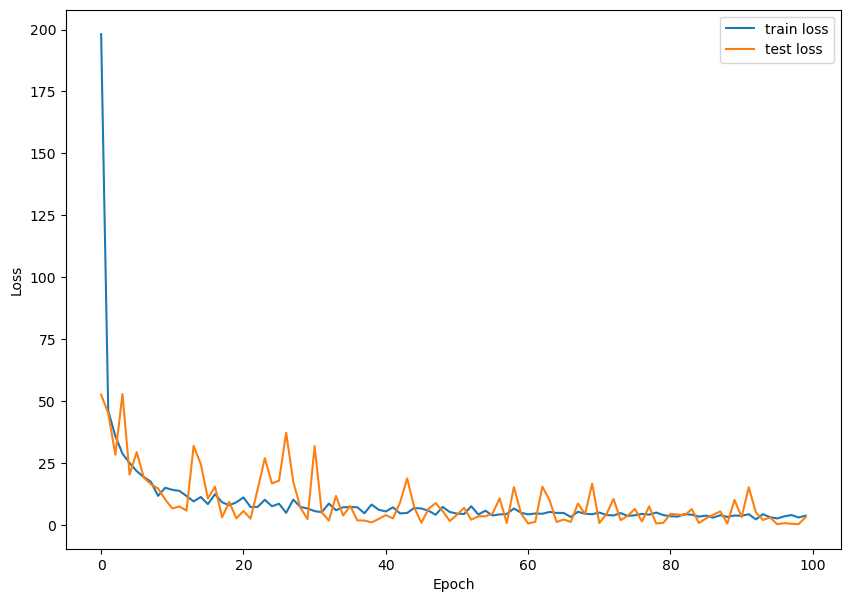

In [33]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

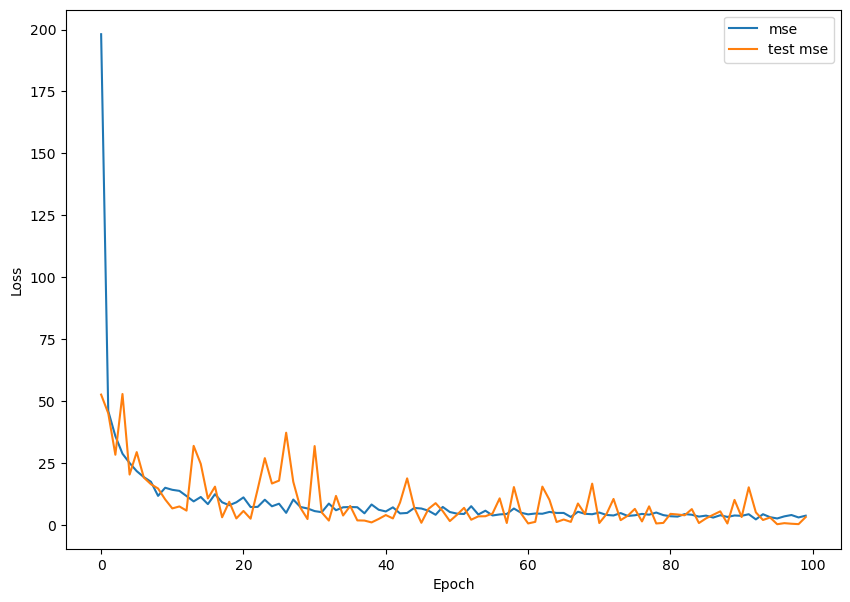

In [34]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()